# Figure 3: Huron's typology

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from src.typology import search_huron_tolerance_param
from src.typology import huron_contour_type
from src.contours import normalized_contours
matplotlib.style.use('styles.mplstyle')

In [2]:
# Load all data
dfs, contours = load_datasets()
param_search = json.load(open('../results/tolerance-parameter-search.json', 'r'))

In [3]:
order = {
    'descending': 'Descencing',
    'convex': 'Convex',
    'horizontal-descending': 'Horizontal-desc',
    'descending-horizontal': 'Desc-horizontal',
    'horizontal': 'Horizontal',
    'ascending': 'Ascending',
    'concave': 'Concave',
    'horizontal-ascending': 'Horizontal-asc',
    'ascending-horizontal': 'Asc-horizontal'
}

/Users/Bas/repos/papers/fma-melodic-contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


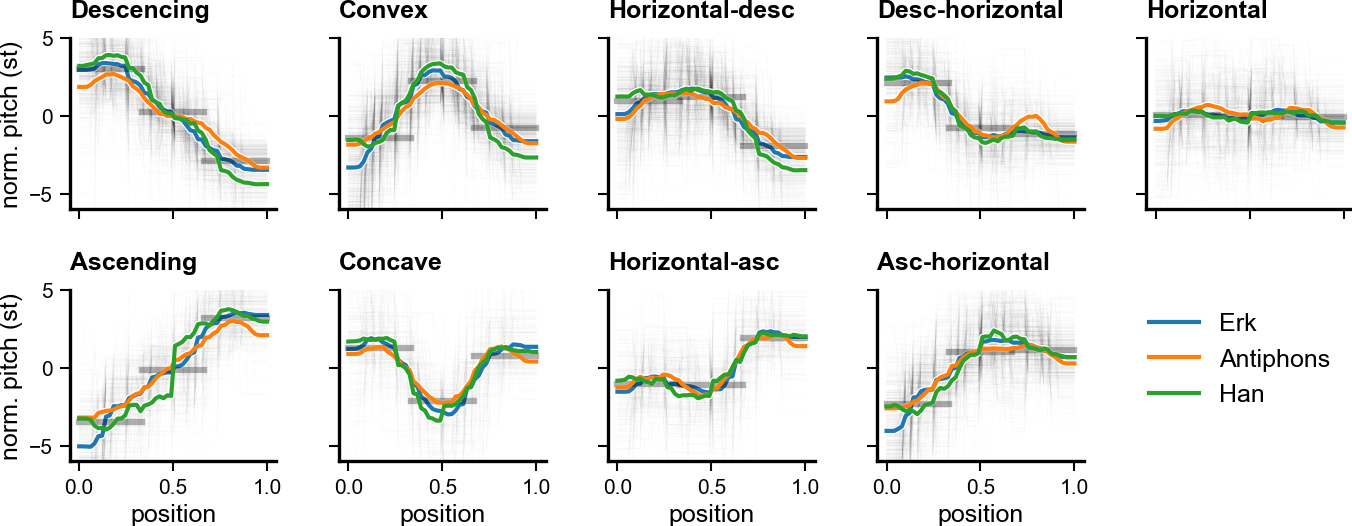

In [4]:
def plot_huron_types_multiple_dataset(dataset_ids, colors, N=500):
    plt.figure(figsize=cm2inch(12,5))
    for i, (contour_type, abbrev) in enumerate(order.items()):
        ax = plt.subplot(int(f'25{i+1}'))
        for j, dataset_id in enumerate(dataset_ids):
            df = dfs[dataset_id]
            tol = param_search[dataset_id]['tolerance']
            cont = contours[dataset_id]
            xs = np.linspace(0, 1, cont.shape[1])
            types = [huron_contour_type(c, tol=tol) for c in cont]

            has_right_type = [t == contour_type for t in types]
            subset = cont[has_right_type]
            plt.plot(xs, subset.mean(axis=0), lw=1.6, c='w', zorder=1)
            plt.plot(xs, subset.mean(axis=0), lw=1, c=colors[j], zorder=2)

            if j== 0:
                color = 'k'
                plt.plot(xs, subset[:N,:].T, '-', color=color, lw=0.2, alpha=.015, zorder=-1);
                third = subset.shape[1] // 3
                begin = subset[:, :third].mean()
                middle = subset[:, third:2*third].mean()
                end = subset[:, 2*third:].mean()
                plt.plot([0/3, 1/3], [begin, begin], '-', c=color, lw=1.5, alpha=.3)
                plt.plot([1/3, 2/3], [middle, middle], '-', c=color, lw=1.5, alpha=.3)
                plt.plot([2/3, 3/3], [end, end], '-', c=color, lw=1.5, alpha=.3)

        plt.title(abbrev, ha='left', x=0)
        if i != 0 and i != 5:
            plt.gca().set_yticklabels([])
        else: 
            plt.ylabel('norm. pitch (st)')
        if i< 5:
            plt.gca().set_xticklabels([])
        else:
            plt.xlabel('position')
        plt.ylim(-6,5)
        
    # Add legend to final subplot
    plt.subplot(2, 5, 10)
    lines = [plt.Line2D([0], [0], color=c, lw=1) for c in colors]
    labels = [d.replace('liber-', '').capitalize() for d in dataset_ids]
    plt.axis('off')
    plt.legend(lines, labels)
    plt.tight_layout()

plot_huron_types_multiple_dataset(['erk', 'liber-antiphons', 'han'], colors=['C0', 'C1', 'C2'])
plt.savefig('../figures/figS04-huron-contour-types.pdf')